# MCMC fit with Chase+2017 Mini ($\lambda_0, \sigma$ fixed)

In [7]:
# imports
from importlib import reload
from importlib.resources import files
import os
import numpy as np

from scipy.optimize import curve_fit

import pandas
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d

from bing.models import anw as bing_anw
from ocpy.utils import plotting

import anly_utils
import fit_anw

In [2]:
%matplotlib ipympl

# defs

In [22]:
def show_fit(model, model_anw, p0, fit_lbl, abs_noise:float):
    fig = plt.figure(figsize=(9,5))
    ax = plt.gca()
    ax.plot(model.wave, model.eval_anw(p0).flatten(), 'b-', label=fit_lbl)
    ax.plot(model.wave, model_anw, 'k-', label='True')
    ax.legend(fontsize=15.)
    ax.errorbar(model.wave, model_anw, yerr=abs_noise, fmt='o', color='k')
    # 
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel(r'$a_{\rm nw} \; \rm [m^{-1}]$')
    plotting.set_fontsize(ax, 17)
    plt.show()

# Parameters

In [14]:
idx=170 
show=True 
use_chisq=False 
nsteps=20000 
max_wave=600.
abs_noise=0.002 
chk_guess=True 
min_wave=400.

# Init model

In [9]:
init_from_chi2='fitanw_170_LM_Chase2017Mini.npz'
d = np.load(init_from_chi2)

In [17]:
model = bing_anw.init_model('Chase2017Mini', d['wave'])
model_anw = d['obs_anw']

# Show the initial guess

In [11]:
p0 = d['ans']

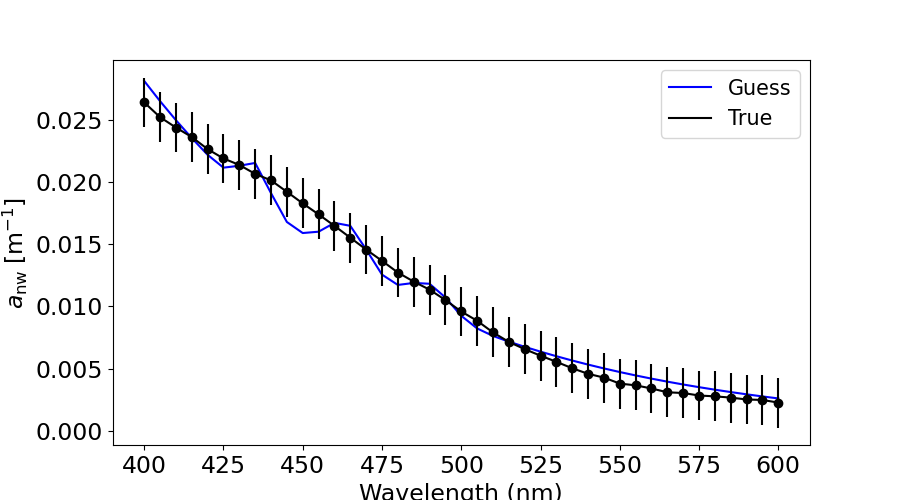

In [23]:
show_fit(model, model_anw, p0, 'Guess', abs_noise)

# Show the fit

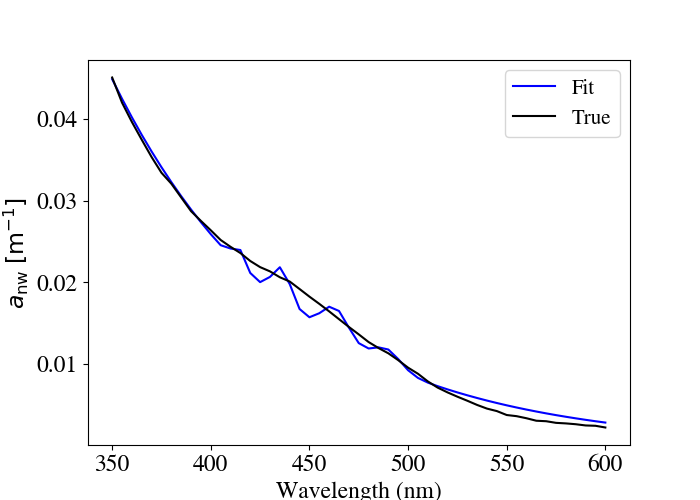

In [23]:
show_fit(model, model_anw, ans, 'Fit')

# Errors

## Diagonal

In [29]:
perr = np.sqrt(np.diag(cov))
perr

array([7.04010696e+06, 2.46115662e+03, 6.51824221e+05, 2.39594457e+02,
       1.36569229e+02, 3.81705998e-01, 1.66175345e-01, 1.26109312e+03,
       1.31859853e+00, 2.46772876e-01, 4.02710043e+02, 4.08823713e+02,
       1.32417270e+02, 5.17769113e-01, 1.76560648e-01, 4.95886305e+02,
       3.48101519e-01, 2.91597066e-01, 4.06511283e+02, 4.11991268e+02,
       3.08102368e+00, 4.11357893e-03, 2.25252242e-03, 5.30379751e+00,
       1.31377645e-02, 6.90399282e-03, 4.40336752e+00, 4.43814948e+00])

## Percent error

In [30]:
perc_err = 100*perr / ans
perc_err

array([-2.64801301e+08, -1.25607749e+05, -4.01075987e+07, -1.22275313e+04,
       -2.55000633e+03, -1.42538579e+01, -7.02538536e+00, -2.34582577e+04,
       -5.49341029e+01, -9.27498158e+00, -6.81400244e+03, -6.91776494e+03,
        9.85640579e+03,  5.17769209e+01,  1.50124956e+01,  4.60668167e+04,
        2.67558412e+01,  2.24127858e+01,  3.17877590e+04,  3.22148637e+04,
        1.19167297e+02,  1.57186794e-01,  8.53394186e-02,  1.99184374e+02,
        4.92866830e-01,  2.56719967e-01,  1.61585864e+02,  1.60430004e+02])

## Show the covariance array

/tmp/ipykernel_1542876/2038748389.py:3: RuntimeWarning: invalid value encountered in log10
  img = ax.imshow(np.log10(cov))


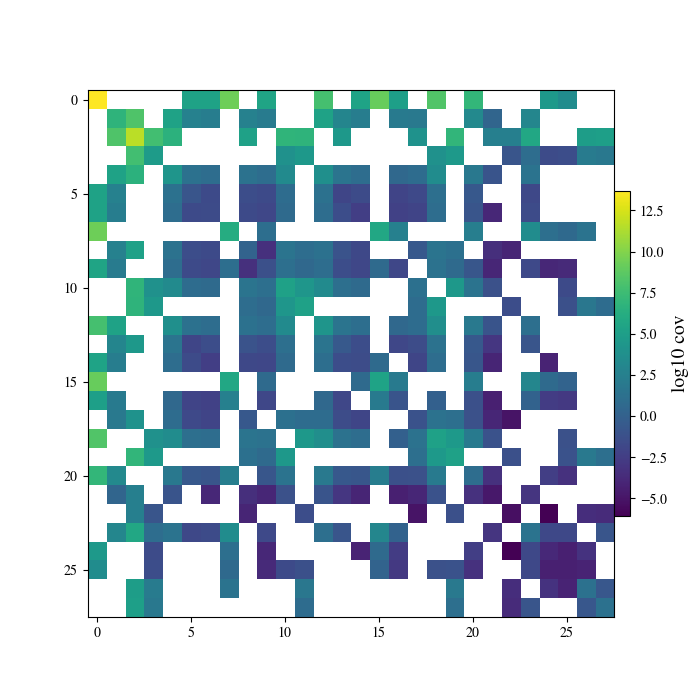

In [28]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()
img = ax.imshow(np.log10(cov))
cbaxes = plt.colorbar(img, pad=0., fraction=0.030)
cbaxes.set_label('log10 cov', fontsize=14)
#
plt.show()